In [2]:
%load_ext autoreload
%autoreload 2

import os
from os.path import join
import numpy as np
import Pk_library as PKL
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('./style.mcstyle')

import h5py

In [3]:
from cmass.utils import load_params
lhid = 3
# wdir = '/home/mattho/git/ltu-cmass/data/'
wdir = '/anvil/scratch/x-mho1/cmass-ili/'
cosmo = load_params(lhid, '../params/latin_hypercube_params.txt')

In [4]:
# Load 3gpc/h simulation

cdir = wdir+f'mtnglike/fastpm/L3000-N384/{lhid}'
with h5py.File(join(cdir, 'nbody.h5'), 'r') as f:
    a = list(f.keys())[4]
    r3 = f[a]['rho'][...]

(-0.5, 383.5, -0.5, 383.5)

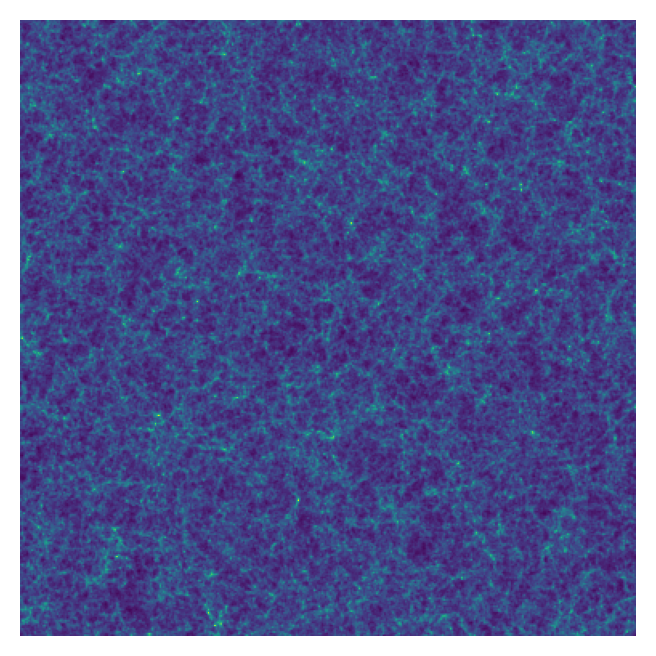

In [5]:
f, ax = plt.subplots(1, 1, figsize=(4,4))
ax.imshow(np.mean(r3[0:32], axis=0).T, cmap='viridis')
ax.axis('off')

In [6]:
# Load halos
with h5py.File(join(cdir, 'halos.h5'), 'r') as f:
    a = list(f.keys())[0]
    print(f.keys())
    hpos = f[a]['pos'][...]
    hvel = f[a]['vel'][...]
    hmass = f[a]['mass'][...]

<KeysViewHDF5 ['0.666660']>


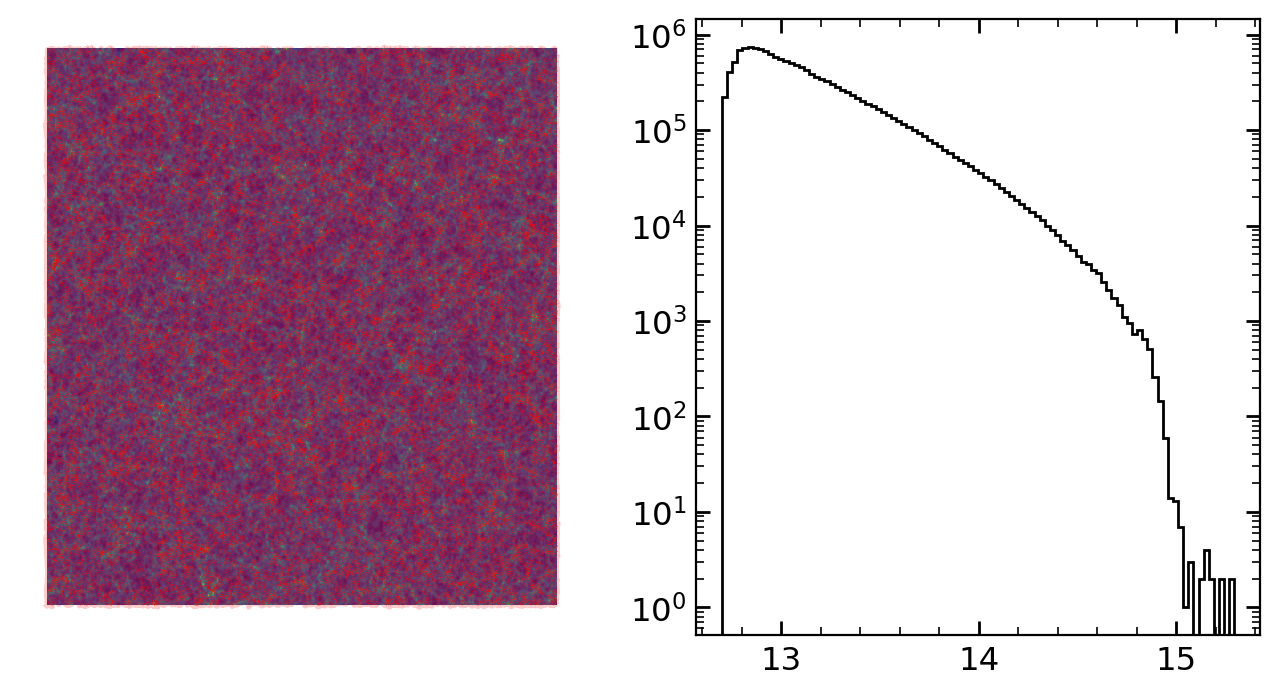

In [7]:
f, axs = plt.subplots(1,2, figsize=(8,4))

axs[0].imshow(
    np.mean(r3[0:40], axis=0).T, cmap='viridis',
    extent=[0, 3000, 0, 3000], aspect='auto')
mask = (hpos[:,0] < 50)
x = hpos[mask]
x = x + np.random.randn(*x.shape)*8/np.sqrt(3)
axs[0].plot(x[:,1], x[:,2], marker=',', c='r', alpha=0.2)
axs[0].axis('off')

axs[1].semilogy()
axs[1].hist(hmass, bins=100, histtype='step', color='k');

In [8]:
hod_seed = 10*lhid+1

# Load galaxies
with h5py.File(join(cdir, 'galaxies', f'hod{hod_seed:05}.h5'), 'r') as f:
    a = list(f.keys())[0]
    print(dict(f.attrs))
    gpos = f[a]['pos'][...]
    gvel = f[a]['vel'][...]

{'alpha': 0.3122481928570818, 'logM0': 14.540625864437756, 'logM1': 14.973740006184926, 'logMmin': 12.572107643321031, 'sigma_logM': 0.5790527832595}


(-162.2591437394947,
 3161.7034202034106,
 -163.1480251878403,
 3166.2594010370135)

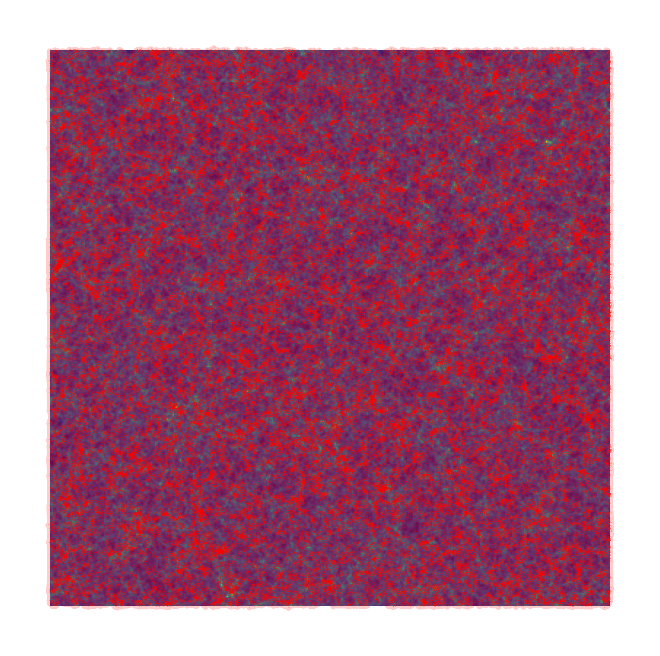

In [9]:
f, ax = plt.subplots(1, 1, figsize=(4,4))
ax.imshow(
    np.mean(r3[0:40], axis=0).T, cmap='viridis',
    extent=[0, 3000, 0, 3000], aspect='auto')
mask = (gpos[:,0] < 50)
x = gpos[mask]
x = x + np.random.randn(*x.shape)*8/np.sqrt(3)
ax.plot(x[:,1], x[:,2], marker=',', c='r', alpha=0.2)
ax.axis('off')

In [10]:
# Load lightcone
aug_seed=0

with h5py.File(join(cdir, 'lightcone', f'hod{hod_seed:05}_aug{aug_seed:05}.h5'), 'r') as f:
    ra = f['ra'][...]
    dec = f['dec'][...]
    z = f['z'][...]
rdz = np.vstack([ra, dec, z]).T

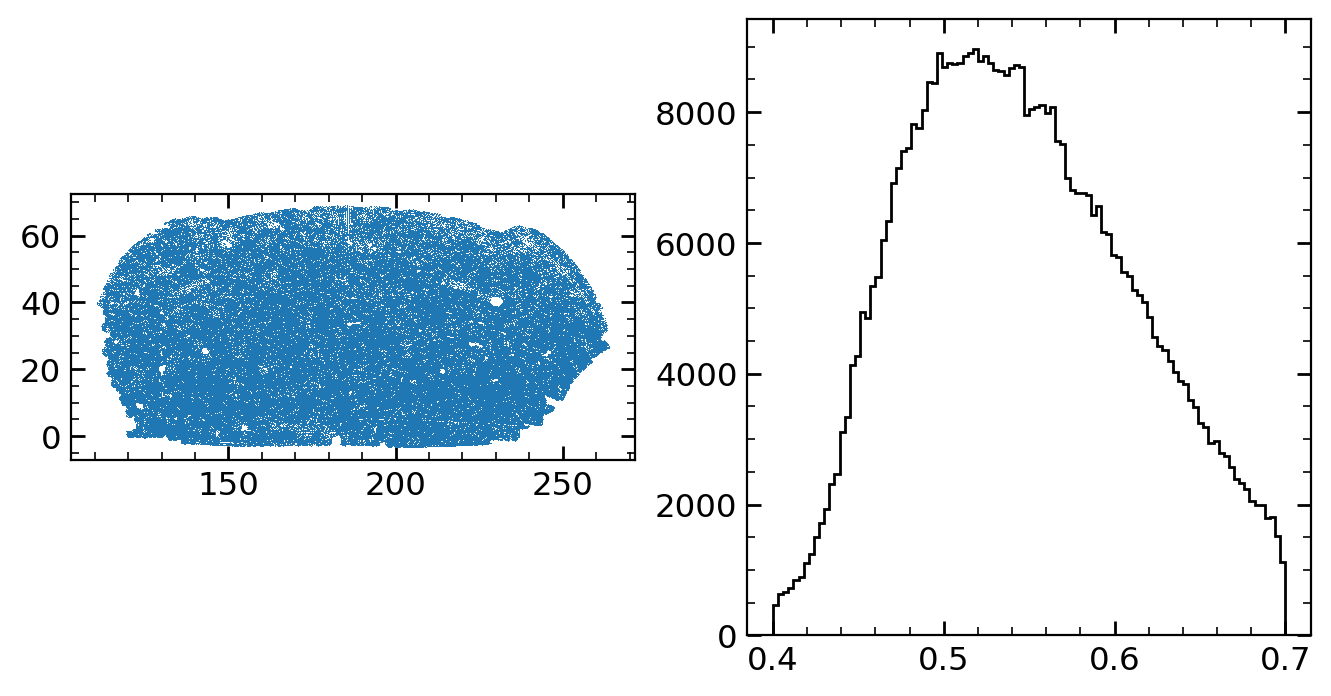

In [11]:
f, axs = plt.subplots(1, 2, figsize=(8,4))

mask = np.abs(z-0.5) < 0.1
axs[0].plot(ra[mask], dec[mask], ',')
axs[0].set_aspect('equal')

axs[1].hist(z, bins=100, histtype='step', color='k');
# axs[1].set_yscale('log')

In [12]:
from cmass.survey.tools import sky_to_xyz
import astropy
cosmo = astropy.cosmology.Planck15

xyz = sky_to_xyz(rdz, cosmo)


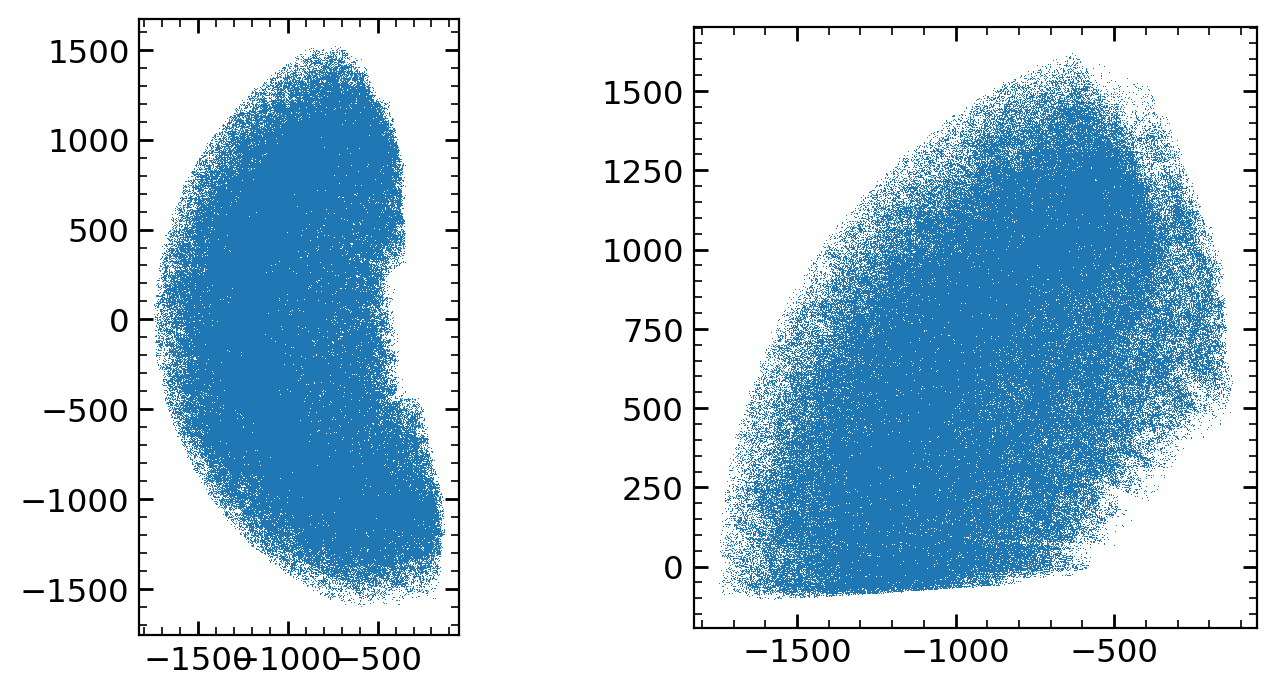

In [13]:
f, axs = plt.subplots(1, 2, figsize=(8,4))
axs[0].plot(xyz[:,0], xyz[:,1], ',')
axs[0].set_aspect('equal')
axs[1].plot(xyz[:,0], xyz[:,2], ',')
axs[1].set_aspect('equal')

In [14]:
offset = 1800, 1650, 150
xyz = xyz + offset
xyz.min(axis=0), xyz.max(axis=0)

(array([54.57031883, 47.37189992, 43.59081188]),
 array([1670.47637971, 3164.61460911, 1766.09933738]))

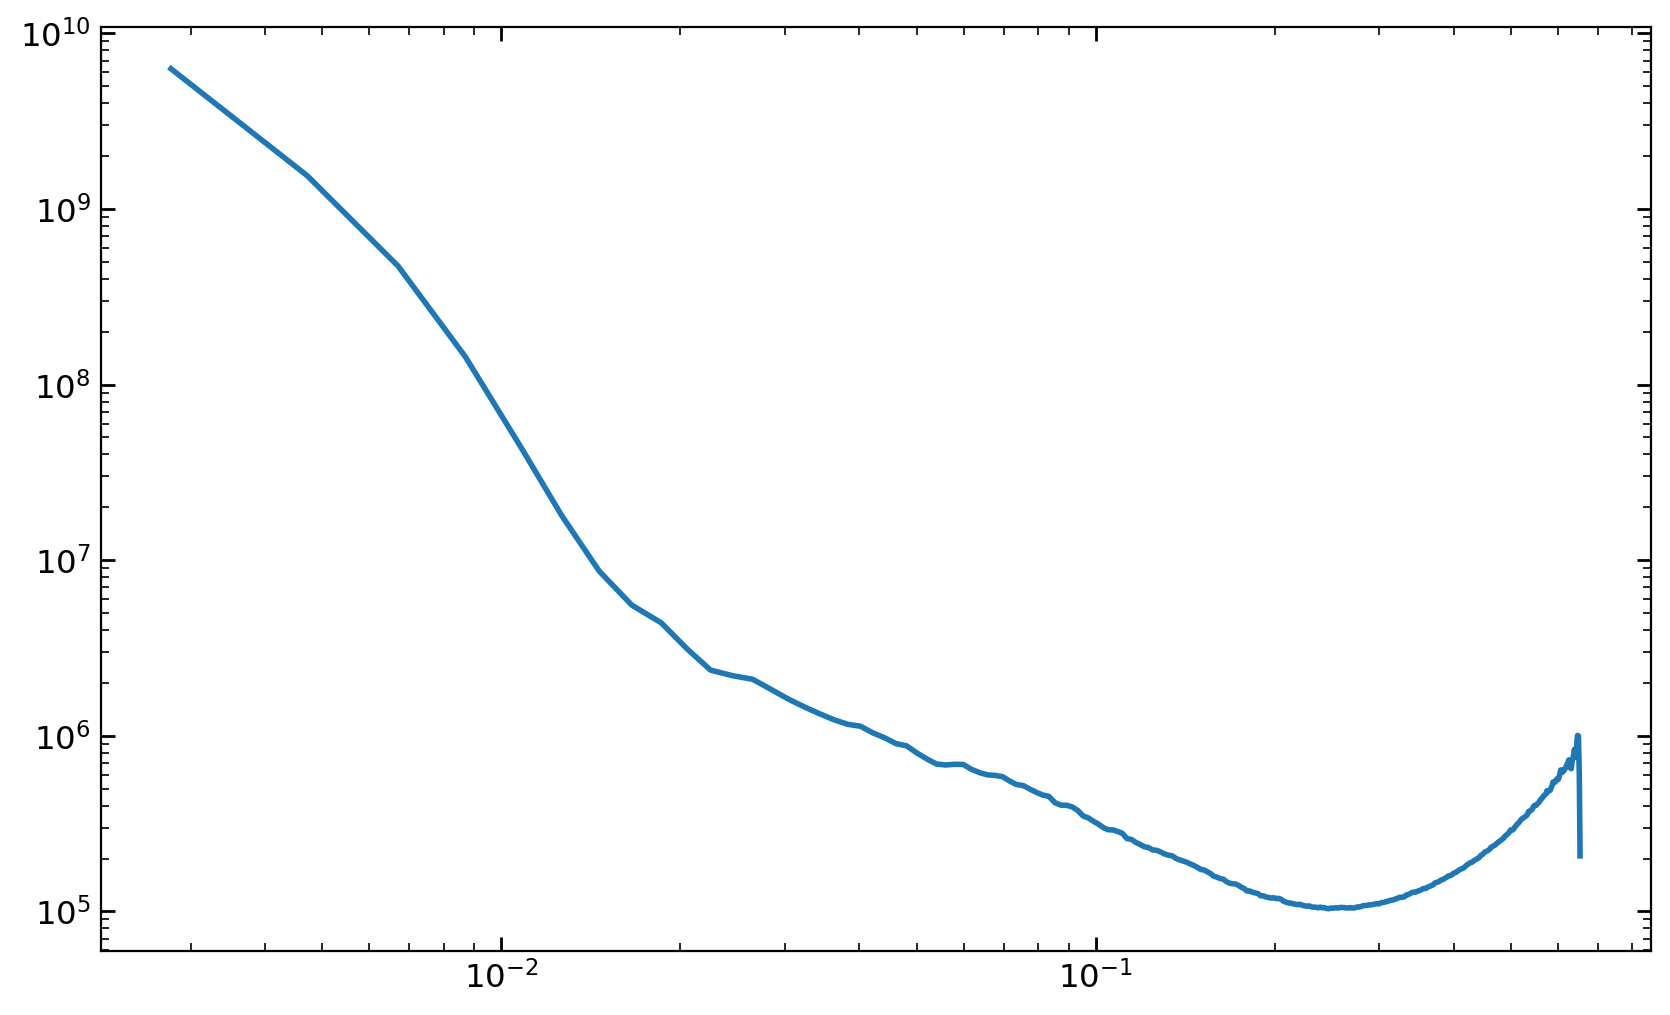

In [20]:
lc_diag = '/anvil/scratch/x-mho1/cmass-ili/mtnglike/fastpm/L3000-N384/3/diag/lightcone/hod00031_aug00001.h5'
with h5py.File(lc_diag, 'r') as f:
    k = f['Pk_k'][...]
    Pk = f['Pk'][...]

plt.loglog()
plt.plot(k, Pk[:,0])

In [5]:
# Load lightcone
aug_seed=0
hod_seed=0
lhid=0
cdir = wdir+f'cmass_ngc/cmass/L0-N0/{lhid}'

with h5py.File(join(cdir, 'lightcone', f'hod{hod_seed:05}_aug{aug_seed:05}.h5'), 'r') as f:
    ra = f['ra'][...]
    dec = f['dec'][...]
    z = f['z'][...]
rdz = np.vstack([ra, dec, z]).T

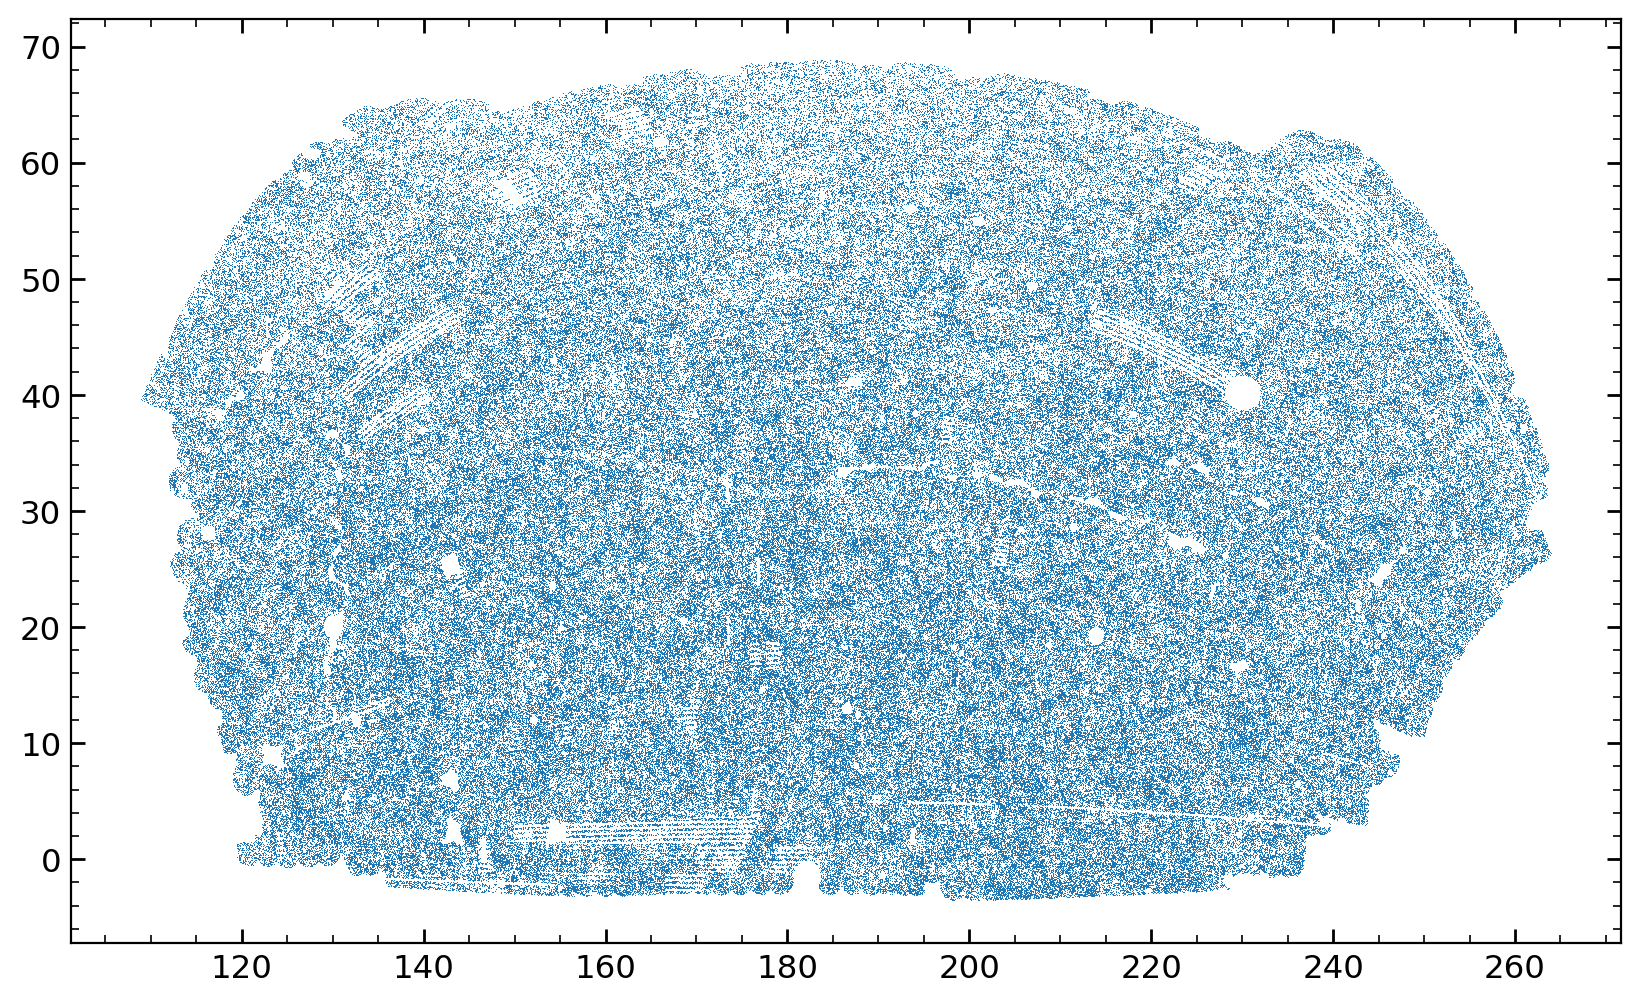

In [8]:
plt.plot(ra, dec, ',')
# plt.hist(z, bins=100, histtype='step', color='k');

In [10]:
from cmass.survey.tools import sky_to_xyz
import astropy
cosmo = astropy.cosmology.Planck15

xyz = sky_to_xyz(rdz, cosmo)


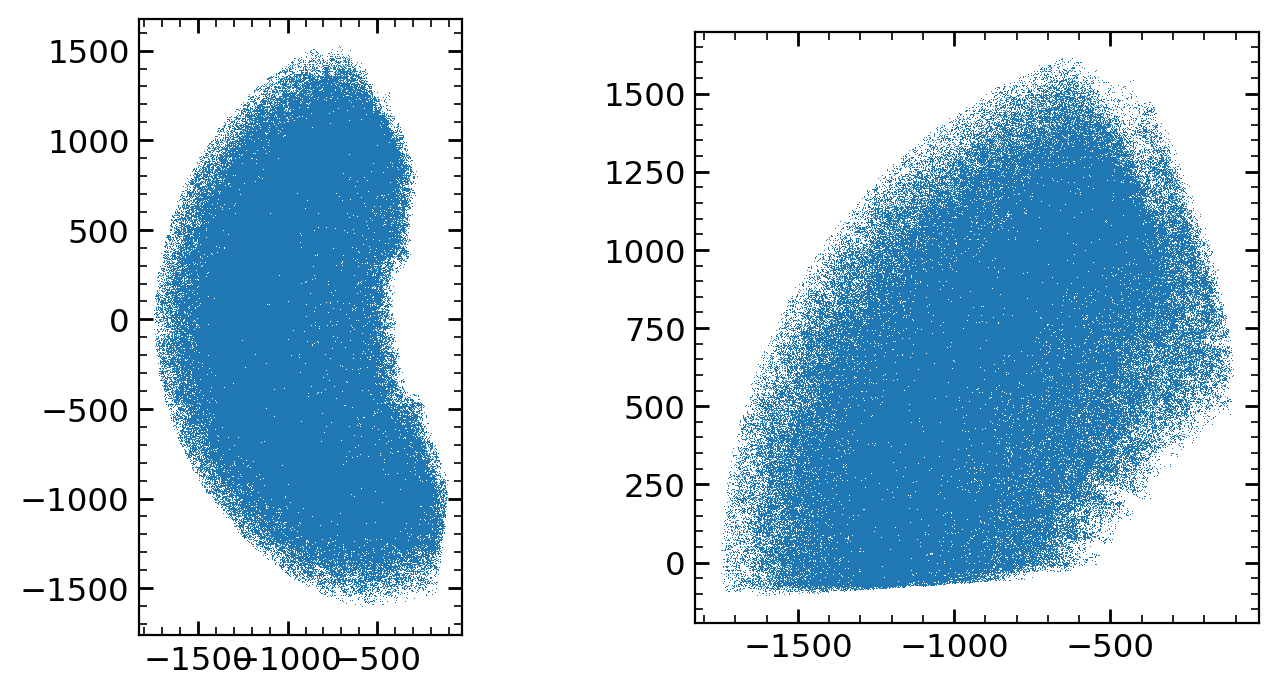

In [11]:
f, axs = plt.subplots(1, 2, figsize=(8,4))
axs[0].plot(xyz[:,0], xyz[:,1], ',')
axs[0].set_aspect('equal')
axs[1].plot(xyz[:,0], xyz[:,2], ',')
axs[1].set_aspect('equal')